# Data Cleaning and Exploration
Emma McKibbin | ECM68@pitt.edu    
Spring 2022

## Table of Contents:
1. [Important Information](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Important-Information)
2. [Unpickle the Data](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Data-Cleaning)
5. [Analysis of Outsider Music](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Analysis-of-Outsider-Music)
6. [Analysis of Popular Music](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Analysis-of-Popular-Music)
7. [Breakdown by Most Represented Outsider Musicians](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Breakdown-by-Most-Represented-Outsider-Musicians)

If some output in this Jupyter notebook doesn't appear, check it out in this [nbviewer](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb).

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using [0_wiki_musicians.py](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/0_wiki_musicians.py).  I manually cleaned the text file ([0_wiki_musicians.txt](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/0_wiki_musicians.txt)) to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using [1_lyricsgenius_requests.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/1_lyricsgenius_requests.ipynb), where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl, not uploaded in the repo) in the [2_load_json_to_df.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/2_load_json_to_df.ipynb) script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into multiple scripts to avoid re-running time-intensive queries.

Anyone interested in recreating the dataset should start with the `lyricsgenius` requests using the musician list.

### Progress Report Info:
This script corresponds to the end of [Progress Report 1](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/progress_report.md#1st-progress-report) onward.

## Unpickle the Data
The JSON files were loaded into a dataframe in [2_load_json_to_df.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/2_load_json_to_df.ipynb).  Let's load up the pickled dataframe:

In [1]:
import pickle
f = open('../data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
**Before cleaning**, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists.

201 lyric entries are not unique.  It's very likely that these represent missing lyrics, which should be excluded from the dataset.

In [5]:
# Find duplicates
lyricsdf.lyrics.duplicated(keep=False).value_counts()

False    3186
True      202
Name: lyrics, dtype: int64

In [6]:
# How many are empty strings?
len(lyricsdf[lyricsdf.lyrics == ""])

202

All of the duplicate lyrics entries (202 of them) are empty strings.

In [7]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


In [8]:
lyricsdf.artist.value_counts()

Wesley Willis        561
Jandek               351
Daniel Johnston      316
Viper                261
Brian Wilson         237
                    ... 
Paul Hawkins           1
Dr. Demento            1
Mrs. Miller            1
Lucia Pamela           1
Damião Experiença      1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  This skew may prove problematic for the ensuing analysis.  Note that the first 6-7 artists have similar magnitudes of lyrics represented in the dataset (in the 100s), so there is a chance the analysis will be equally representative of those musicians, while leaving less represented musicians largely unrepresented in the final results.

SPOILER: This distribution is, indeed, problematic.  Wesley Willis's idiosyncracies only exacerbate the distribution issue, since most of his lyrics follow the same format, include a lot of repetition, and use a few less common words extremely frequently.

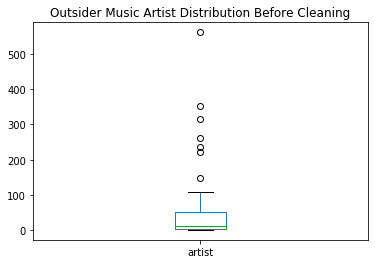

In [9]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Outsider Music Artist Distribution Before Cleaning")
plt.savefig('../images/outsider_artist_boxplt_dist.png')

This box plot visualizes the current artist distribution. There are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

To begin, there are many artifacts remaining from the Genius lyrics website.
- "*Song Title* Lyrics" at the beginning of all lyric data
- Any number of digits followed by "Embed" at the end of all lyric data
- "Transcription in progress..." instead of lyrics

Indexing will be fixed, and formatting will also be cleaned.  "\n" will be stripped from the ends of the lyric text, only after removing "*Song Title* Lyrics" since the number of "\n" after this artifact is not consistent.  "\n" within the lyric body will be replaced with spaces (" ").

First, we'll remove "*Song Title* Lyrics":

In [10]:
# see the lyrics column
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


In [11]:
# cycles through rows, removes the *Song Title* Lyrics from beginning
def removeTitle(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        toRemove = row.title + " Lyrics"
        row.lyrics = row.lyrics.replace(toRemove, "")
        i = i+1

In [12]:
removeTitle(lyricsdf)
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"\nTerrible things, always happening\nJust like..."
1,Abner Jay,Cocaine,\nFolk music is high-class music. There's a lo...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,\nTerrible things; that's what's getting all t...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


Then we'll strip whitespace from the beginning and end of the lyric data.

In [19]:
# strip whitespace from the beginning and end
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.strip("\n"))

In [20]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


.loc[] appears to use indexes that reset for individual artists.  As shown below, .loc[46] will bring of the 46th song of **all artists** with 46 songs or more.  This feature probably won't be more useful than it will be confusing, so to simplify the indexing, we'll reset the indexes.

In [43]:
lyricsdf.loc[46].head()

artist                                                 Ariel Pink
title                                                Death Patrol
lyrics          Come on the streets the death patrol Taking di...
lyrics_lines    Come on the streets the death patrol Taking di...
Name: 46, dtype: object

In [22]:
# This makes sure everything has a unique index
lyricsdf = lyricsdf.reset_index()
lyricsdf = lyricsdf[['artist', 'title', 'lyrics']]
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [23]:
lyricsdf.tail()

,artist,title,lyrics
3383,William Shatner,Together,He says Phoenix\nPegasus\nGrecian urn\nMidwest...
3384,William Shatner,Twilight Zone,(Somewhere in a lonely hotel room\nThere's a g...
3385,William Shatner,Walking on the Moon,Giant steps are what you take\nI hope my legs ...
3386,William Shatner,What Have You Done,She was underwater\nIn the shadows\nWas it the...
3387,William Shatner,You’ll Have Time,"Live life, live life like you're gonna die\nBe..."


Next, we need to fix the "Embed" issue:

In [24]:
# William Shatner "You'll Have Time" ends in "2Embed"
lyricsdf.iloc[-1].lyrics[-50:]

' airplane crash\nCar wreck, a cap in your ass2Embed'

In [27]:
# Randomly sample 5 song endings, check what "Embed"s look like
embedtest = lyricsdf.lyrics.sample(5)
for lyrics in embedtest:
    print(lyrics[-15:])

no dreams2Embed
 and  and Embed
nd Let DieEmbed

I like itEmbed
I love youEmbed


A few features of the "Embed" issue at the tail of the lyrics encountered through sampling:
- No space before "Embed"
- Occasionally (but rarely), there is a digit before (e.g., "1Embed")
    - After checking some lyrics on the Genius site, I found that this number corresponds to the "PYONG"s on the lyrics.  This is sort of like a favoriting/sharing function, but for now, it's sort of unimportant.
    
Both the "Embed" and the preceding digit, if present, should be removed.  There is some risk that removing the digit will delete a digit at the end of the lyrics, but I judge that, in this case, losing a digit is preferable to including extraneous data.


In [28]:
# Remove the nEmbed using a regex
def removeEmbed(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        embed = row.lyrics
        row.lyrics = re.sub(r'\d*Embed', "", embed)
        #print(row.lyrics[-50:])
        i = i+1

In [29]:
removeEmbed(lyricsdf)

In [30]:
# Randomly sample 5 song endings, check that "Embed"s are gone
embedtest = lyricsdf.lyrics.sample(5)
for lyrics in embedtest:
    print(lyrics[-15:])

ak through this
ve to hold you)
e up here alone
 what do you do
replace my soul


Let's set "Transcription in progress ..." lyric entries to empty strings so that they may be excluded from the final dataset in its cleaned form.

In [32]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"transcription", lyricsdf.lyrics[i], re.IGNORECASE)
    if x: print(x)
    i = i+1

['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']


In [33]:
# There are 6! and they all appear to say "Transcription in progress"
i=0
transcript_del = []
while i != len(lyricsdf):
    if "Transcription in progress" in lyricsdf.iloc[i].lyrics:
        transcript_del.append(i)
    i= i+1

In [34]:
for i in transcript_del:
    print(lyricsdf.iloc[i].lyrics)

Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins


In [35]:
# They're all the same string, so:
lyricsdf.lyrics = lyricsdf.lyrics.replace("Transcription in progress by Viper Crackposting admins", None)

In [36]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

In [37]:
# replaces newlines with spaces, but maintains the line-break data in a separate column
lyricsdf["lyrics_lines"] = lyricsdf.lyrics
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\n", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening Just like ye..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine Running round my heart And th..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried I cried in the ni-ight Oh please co..."


In [38]:
# The end is looking pretty good, too! No Embed, no newlines
for lyrics in lyricsdf.lyrics[:5]:
    print(lyrics[-50:])

it with you, honey Bring it with you when you come
heart And it runnin', oh it runnin' Round my brain
nd then running Lord, it's running Round my brain 
with me baby And I declare, I declare I am through
back tonight And then I'll kiss and hold you tight


### Language Detection
I attempted 2 kinds of language detection, both of which had some influence on the final dataset but didn't quite achieve what I had anticipated.
1. **Character Encoding-based Detection**    
    If a character wasn't able to be decoded in ASCII, the song lyrics would be considered non-English.  This was attempted both categorically (any non-English character would identify the lyrics as non-English) and continuously (a certain percentage of characters would identify the lyrics as non-English), but neither was very conclusive in terms of language detection.    
    However, this method was **useful for identifying formatting errors** that wouldn't have otherwise gone unnoticed, so this section remains in this final document.
2. **SpaCy Language Detector**    
    Since character-based detection wasn't effective, I tried using the pre-packaged detector models from spaCy.  Though this was able to guarantee a fully English dataset, it also tags many English lyrics as non-English languages, especially for very short, repetitive, or nonsense lyrics.  In the end, I was able to use this to definitively remove the Swedish and Japanese data, but any other non-English lyrics will remain in the dataset.

In [44]:
# This is not English :)
lyricsdf.iloc[1915].lyrics

'En dag när jag gick i en skog Så tappade jag mina byxor Jag märkte det ej Men jag mötte en tjej Och hon tittade så konstigt på mig Men så sa hon hej ... ... Och sen så gick jag hem'

**Character Encoding-based Detection**    
The code below was taken from this [stack overflow page](https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python).  It should identify non-English characters not found in ASCII.

In [46]:
# Returns a boolean: False if the lyrics contain "non-English" characters
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [49]:
# Test on the Swedish lyrics (and it works!)
isEnglish(lyricsdf.iloc[1915].lyrics)

False

In [50]:
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening Just like ye...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine Running round my heart And th...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried I cried in the ni-ight Oh please co...",True


In [51]:
# That's a lot of non-English songs. Hmm...
lyricsdf.eng_chars_only.value_counts()

True     2337
False    1051
Name: eng_chars_only, dtype: int64

Character-encoding based detection is very useful for finding formatting issues caused by unexpected characters.  Note that the list of "non-English" lyrics below actually includes many English lyrics.  As shown in the next few code blocks, this is due to characters like "\u2005", "\u205f", formatted ellipses "…", and escaped apostrophes "\\'".  The punctuation will be standardized, and whitespace characters will be replaced with spaces (" ").

In [52]:
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

3261    WMF: Are ya ROLLIN'?? ARE YA ROLLIN'??!!!  . ....
1912    En morgon när jag skulle cykla Tappa' jag mina...
11      Şurup gibiyim şurup Turp gibiyim turp turp Ben...
2457    Money game crazy My crib game crazy My model g...
2803    Doug Mowley was a train robbery suspect He rob...
2641    'Cause this Is how we ride Forever we gon' gli...
3297    Fairy tales can come true, it can happen to yo...
3043    This is a penitentiary for criminals It is a m...
3364    Friends, Romans, countrymen, lend me your ears...
1876    Ur Ugges gröna hjärna Det värker en fasan Som ...
Name: lyrics, dtype: object

In [53]:
# Example of \u2005
lyricsdf.iloc[3175].lyrics

"This band rocked the Czar bar About 180 people were at the show The rock show was\u2005a\u2005rock 'n roll\u2005experience It was a great knockout  The Dollrods The\u2005Dollrods The Dollrods The Dollrods  The band played it on The band got down like a Magikist They can really rock the nation They can really jam the guitar  The Dollrods The Dollrods The Dollrods The Dollrods  The show was a rock 'n roller The jam session was a big rock 'n roll blast The jam session was kick ass show They can really knock it out The Dollrods The Dollrods The Dollrods The Dollrods  Rock over London, rock on Chicago Diet Pepsi, uh-huh!"

In [64]:
# Replace the whitespace character \u2005 with a space
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u2005", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u2005", " "))

In [59]:
# Example of \u205f
lyricsdf.iloc[2734].lyrics

"This band played at the Empty Bottle About two hundred fifty people were at the rock show The jam session was perfect The rock 'n roll burned a monkey up  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The band played it on The\u205fband\u205fgot\u205fdown like a\u205fMagikist The crowd roared\u205flike a lion The jam session whooped a llama's ass  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The show was over A lot of people met the band The rock 'n roll show was awesome It whipped a pony's ass with a belt Brain Kiss Brain Kiss Brain Kiss Brain Kiss  Rock over London, rock on Chicago Radio Shack, you got questions, we got answers"

In [65]:
# Replace the whitespace character \u205f with a space
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u205f", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u205f", " "))

In [62]:
# Example of escaped apostrophe \'
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev\'ry time I climb up to Paradise How many times I\'ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There\'s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I\'m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn\'t any sacrifice We\'re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover\'s Ledge above If you\'ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

In [66]:
# Replace escaped apostrophe with curly apostrophe, since other lyrics use that format
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\'", "’"))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\'", "’"))


In [67]:
# Example of specially formatted ellipsis "…"
lyricsdf.iloc[2522].lyrics

'To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome  Don’t get sent home In a body bag for not leaving me alone I don’t care what you got goin on Cuz i already paid and my body is every bone Yea i know, that I’m conceited and arrogant And that can be repeated But that’s just my personality And it’s magnified cuz im a G So i ain’t trying to hear what they gotta say Like they ? for a jack, so i ? the gun spray These marks are fucking up my day Rollin up asking if they may Ask me a question about some bullshit Bitch ass nigga you better get a grip I’m tired of playing with these faggots I’m bout to get my four and let you snitch niggas have it To yo dome with the chrome To yo dome with the chrome To yo dome with the chro

In [68]:
# Replace special ellipsis with plain "..."
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("…", "..."))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("…", "..."))
lyricsdf.iloc[2522].lyrics[-400:-200]

'ck on a mission But wondering when this green gon’ stop coming in I’ll go... To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with'

Quick double-check to see if there are any more formatting issues:

In [71]:
# It looks like there are not "\" formatting issues left
for i in range(len(lyricsdf)):
    x = re.findall(r"\\", lyricsdf.lyrics[i])
    if x: print(x)

The eng_chars_only column isn't very useful at the moment.  Because it's a boolean, many of the lyrics marked as "non-English" are actually English but contain special characters or accented letters.

I attempted a continuous approach by separating English from non-English using a cutoff % of non-English characters.  I scrapped this, as it was not any more effective than the categorical approach and did not give additional insight into the data cleaning.

**SpaCy Language Detection**    
To weed out the non-English lyrics more definitively, I'll try the spaCy LanguageDetector package, using the small English model.

In [72]:
import spacy

Using the spaCy documentation and this [stack overflow page](https://stackoverflow.com/questions/66712753/how-to-use-languagedetector-from-spacy-langdetect-package), I'll create a new column to store the language detected and the confidence score.

In [73]:
from spacy_langdetect import LanguageDetector
from spacy.language import Language

def get_lang_detector(nlp, name):
    return LanguageDetector()

# create the `nlp` language detector with the English model and test
nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999975645287333}


In [74]:
# Save the detector output to a column 'lang_detect'
def langDetect(nlp, text):
    doc = nlp(text)
    return doc._.language

lyricsdf["lang_detect"] = lyricsdf.lyrics.map(lambda x: langDetect(nlp, x))

In [75]:
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening Just like ye...",True,"{'language': 'en', 'score': 0.9999968176108587}"
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,"{'language': 'en', 'score': 0.9999957870727334}"
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine Running round my heart And th...",True,"{'language': 'en', 'score': 0.9999948253358504}"
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,"{'language': 'en', 'score': 0.9999987996976376}"
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried I cried in the ni-ight Oh please co...",True,"{'language': 'en', 'score': 0.9999957025525114}"


In [76]:
# lang_detect is a short dictionary, containing 'language' and 'score' as keys

# extract 'language' into a separate column
lyricsdf["lang"] = lyricsdf.lang_detect.map(lambda x: x["language"])

In [77]:
lyricsdf.lang.value_counts()

en         3049
UNKNOWN     224
sv           59
fr            7
tl            6
so            6
id            6
es            3
ja            3
no            3
sw            2
ca            2
cy            2
af            2
nl            2
it            2
tr            2
pt            1
et            1
sk            1
pl            1
hr            1
lt            1
de            1
sl            1
Name: lang, dtype: int64

In [79]:
non_eng = lyricsdf[lyricsdf.lang != "en"]
non_eng.sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
859,Gary Wilson,"Weird World, Pt. 2",,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
2307,The Shaggs,Shaggs’ Own Thing (Musical Version),,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
131,Ariel Pink,Red Vinyl,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
1834,Moondog,Suit No.1,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
2410,Vennu Mallesh,12 Angry Men,"1 vote 2 vote 3 vote, for guilty 4 vote 5 vote...","1 vote 2 vote 3 vote, for guilty 4 vote 5 vote...",True,"{'language': 'nl', 'score': 0.9571958086093986}",nl


'UNKNOWN' language is detected when the lyric entry is empty ('').  Some languages appear to be detected correctly, but many English lyrics are identified as non-English.  As demonstrated in the code block below, all lyrics identified as English seem to be correct.

In [93]:
lyricsdf[lyricsdf.lang == "en"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
405,Brian Wilson,Venice Beach (Narrative),Venice Beach is poppin’ Like live shrimp dropp...,Venice Beach is poppin’ Like live shrimp dropp...,True,"{'language': 'en', 'score': 0.9999975851858068}",en
456,Daniel Johnston,A Little Bit Of Soap,A little bit of soap Will wash away your lipst...,A little bit of soap Will wash away your lipst...,True,"{'language': 'en', 'score': 0.9999970751142965}",en
1060,Jandek,Comedy,Here’s looking at you kid You got the German m...,Here’s looking at you kid You got the German m...,True,"{'language': 'en', 'score': 0.9999948271970671}",en
1991,R. Stevie Moore,Love Has Doubt,Love has doubt when you’re out Love has what w...,Love has doubt when you’re out Love has what w...,True,"{'language': 'en', 'score': 0.9999980646581537}",en
532,Daniel Johnston,Frankenstein Love,There was a time When I was Frankenstein Dress...,There was a time When I was Frankenstein Dress...,True,"{'language': 'en', 'score': 0.9999963451176974}",en


In [94]:
# Check some of the less frequent languages
lyricsdf[lyricsdf.lang.isin(['ja', 'no', 'es', 'nl', 'tr', 'sw', 'it', 'ca', 'et', 'pt', 'pl', 'sl', 'sk', 'hr'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
129,Ariel Pink,Ramaya,"Right! (Woo!) Bokuko ramaya, bokuko (Woo!) ...","Right! (Woo!) Bokuko ramaya, bokuko (Woo!) ...",True,"{'language': 'sw', 'score': 0.7142825074644872}",sw
1754,Les Rallizes Dénudés,記憶は遠い (A Memory Is Far),Tooi kioku no nakani omae wo miru Mishiranu fu...,Tooi kioku no nakani omae wo miru Mishiranu fu...,True,"{'language': 'sw', 'score': 0.9999977337924266}",sw
223,Brian Wilson,Deck The Halls,"Deck the halls with boughs of holly Fa, la, la...","Deck the halls with boughs of holly Fa, la, la...",True,"{'language': 'es', 'score': 0.9999749222158598}",es
2409,Varg Vikernes,Den Store Søvn,Det blir godt å sove Sove hele natten Helt til...,Det blir godt å sove Sove hele natten Helt til...,False,"{'language': 'no', 'score': 0.9999939980339456}",no
1437,John Frusciante,Guitar,"Uh, uh Move your body like Uh Like Uh, uh Move...","Uh, uh Move your body like Uh Like Uh, uh Move...",True,"{'language': 'sk', 'score': 0.8571399071978751}",sk


In [95]:
# Check out some of the more frequent languages:
lyricsdf[lyricsdf.lang.isin(['fr', 'so', 'tl', 'id', 'cy', 'af'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
57,Ariel Pink,El Fantastic Summer Part,Yeah,Yeah,True,"{'language': 'id', 'score': 0.5714264813325274}",id
1776,Moondog,Bells Are Ringing,Bells are ringing dinga linga linga linga ling...,Bells are ringing dinga linga linga linga ling...,True,"{'language': 'tl', 'score': 0.7142819743675705}",tl
105,Ariel Pink,Nana Reprise,"Nana, nana she’s looking out for us Nana, nana...","Nana, nana she’s looking out for us Nana, nana...",True,"{'language': 'tl', 'score': 0.5714260370193606}",tl
82,Ariel Pink,I Disguise You,I disguise you I disguise you I disguise you I...,I disguise you I disguise you I disguise you I...,True,"{'language': 'fr', 'score': 0.5714271186988191}",fr
72,Ariel Pink,Gone,"Gone, picture me gone Gone, gone, gone Picture...","Gone, picture me gone Gone, gone, gone Picture...",True,"{'language': 'fr', 'score': 0.7142837783133478}",fr


The above lists are samples, but I've skimmed through the full non-English lists. SpaCy's language detector using the small English model isn't a perfect solution.  Many English lyrics have been misidentified as foreign languages, as shown below with "Deck the Halls," where too many "la"s have caused a very confident 'Spanish' classification.

In [96]:
print("language:", lyricsdf.iloc[223].lang, "\n", lyricsdf.iloc[223].lyrics)

language: es 
 Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, la, la, la Troll the ancient Yule tide carol Fa, la, la, la, la, la, la, la, la See the blazing Yule before us Fa, la, la, la, la, la, la, la, la Strike the harp and join the chorus Fa, la, la, la, la, la, la, la, la Follow me in merry measure Fa, la, la, la, la, la, la, la, la While I tell of Yule tide treasure Fa, la, la, la, la, la, la, la, la Fast away the old year passes Fa, la, la, la, la, la, la, la, la Hail the new, ye lads and lasses Fa, la, la, la, la, la, la, la, la Sing we joyous, all together Fa, la, la, la, la, la, la, la, la Heedless of the wind and weather Fa, la, la, la, la, la, la, la, la Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, l

In [97]:
lyricsdf.iloc[223].lang_detect

{'language': 'es', 'score': 0.9999749222158598}

In [99]:
# All 59 of the Swedish tagged lyrics are Swedish (or, at the very least, not English)
# Only a sample shown below
lyricsdf[lyricsdf.lang == "sv"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
1888,Philemon Arthur And The Dung,Du är min ende vän,"Du är min enda vän, jag tänker på dig varje da...","Du är min enda vän, jag tänker på dig varje da...",False,"{'language': 'sv', 'score': 0.9999980028357259}",sv
1932,Philemon Arthur And The Dung,Vals I Fel Dur,Jag sitter här ensam på min stol Och tänker på...,Jag sitter här ensam på min stol Och tänker på...,False,"{'language': 'sv', 'score': 0.9999969947017405}",sv
1925,Philemon Arthur And The Dung,Scoutvisan,Kom här allihopa så ska vi ut och gå Jag komme...,Kom här allihopa så ska vi ut och gå Jag komme...,False,"{'language': 'sv', 'score': 0.9999960989227313}",sv
1918,Philemon Arthur And The Dung,Om Jag Hade Pjäxor,Blommorna på ängen växer Och det gör ju även j...,Blommorna på ängen växer Och det gör ju även j...,False,"{'language': 'sv', 'score': 0.9999970064844665}",sv
1902,Philemon Arthur And The Dung,Jag Mår Så Illa,Jag mår så illa! Jag mår så illa så jag måste ...,Jag mår så illa! Jag mår så illa så jag måste ...,False,"{'language': 'sv', 'score': 0.9999960092006496}",sv


In [101]:
# All lyrics tagged as Japanese are Japanese
lyricsdf[lyricsdf.lang == "ja"]

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
1746,Les Rallizes Dénudés,Enter the Mirror,あらゆる夜（闇）を通り過ぎてきた 時々ひとりで あらゆる闇（夜）を通り過ぎてきた お前といっ...,あらゆる夜（闇）を通り過ぎてきた 時々ひとりで あらゆる闇（夜）を通り過ぎてきた お前といっ...,False,"{'language': 'ja', 'score': 0.9999999984870188}",ja
1749,Les Rallizes Dénudés,White Awakening,パターンA： ----------- 私の春が始まった時 あなただけしか欲しくなかった 風の...,パターンA： ----------- 私の春が始まった時 あなただけしか欲しくなかった 風の...,False,"{'language': 'ja', 'score': 0.999999999876712}",ja
1753,Les Rallizes Dénudés,記憶は遠い,遠い記憶の中にお前を見る 見知らぬ二つの街が通り過ぎる 僕らの周りで海が血に変わる それしか...,遠い記憶の中にお前を見る 見知らぬ二つの街が通り過ぎる 僕らの周りで海が血に変わる それしか...,False,"{'language': 'ja', 'score': 0.9999999948967324}",ja


For the analysis, I will remove those languages which I know are entirely non-English lyrics, including Swedish ('sv') and Japanese ('ja').  The other languages identified are not so definitively English or non-English, so I will leave them in the dataset for analysis.  Given that there were 59 Swedish songs identified, it seems worthwhile to remove them.

If it seems as if the non-English data may be confounding the analysis, the songs identified as English ('en') appear to be identified as such reliably and can be used for a smaller analysis.  However, I would like to avoid doing this, since many of the stranger, non-sense lyrics that could characterize outsider music have been identified as non-English.

In [102]:
# And UNKNOWN language is just the empty string lyrics!
lyricsdf[lyricsdf.lang == "UNKNOWN"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang
1310,Jandek,The Beginning,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
516,Daniel Johnston,Excuse Me,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
169,Ariel Pink,Zip Drive,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
1005,Jad Fair,Oh,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
2090,Roky Erickson,May the Circle Remain Unbroken,,,True,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN


In [103]:
# save the data into a different data frame
lyricsdf_orig = lyricsdf

# update the lyricsdf to remove Swedish, Japanese, and empty string lyric entries
lyricsdf = lyricsdf[~lyricsdf.lang.isin(['sv', 'ja', 'UNKNOWN'])]

## Analysis of Outsider Music
The analysis here is fairly simple.  We'll look at the:
- token count distribution
- artist distribution
- most common word tokens, with and without stopwords

**Token Count Distribution**    
The lyrics need to be tokenized so that they can be analyzed at the word-level.

In [105]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [108]:
# tokenize, then lowercase tokens
lyricsdf["tokens"] = lyricsdf.lyrics.map(lambda x: nltk.word_tokenize(x))
lyricsdf.tokens = lyricsdf.tokens.map(lambda x: [word.lower() for word in x])

# create token count column
lyricsdf["token_ct"] = lyricsdf.tokens.map(len)
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang,tokens,token_ct
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening Just like ye...",True,"{'language': 'en', 'score': 0.9999968176108587}",en,"[terrible, things, ,, always, happening, just,...",429
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,"{'language': 'en', 'score': 0.9999957870727334}",en,"[folk, music, is, high-class, music, ., there,...",501
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine Running round my heart And th...",True,"{'language': 'en', 'score': 0.9999948253358504}",en,"[cocaine, ,, cocaine, running, round, my, hear...",443
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,"{'language': 'en', 'score': 0.9999987996976376}",en,"[terrible, things, ;, that, ’, s, what, ’, s, ...",733
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried I cried in the ni-ight Oh please co...",True,"{'language': 'en', 'score': 0.9999957025525114}",en,"[i, ,, i, cried, i, cried, in, the, ni-ight, o...",152


In [109]:
# lyricsdf["type_ct"] = lyricsdf.tokens.map(lambda x: len(set(x)))    # type was not used in the present analysis
# lyricsdf["TTR"] = lyricsdf.type_ct / lyricsdf.token_ct              # TTR was not used in the present analysis

In [110]:
lyricsdf.token_ct.describe()

count    3102.000000
mean      215.177950
std       162.026948
min         1.000000
25%       119.000000
50%       173.000000
75%       267.000000
max      2155.000000
Name: token_ct, dtype: float64

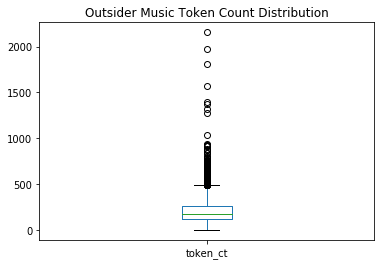

In [111]:
# Token count distribution
lyricsdf.token_ct.plot(kind = "box", rot=0, title = "Outsider Music Token Count Distribution")
plt.savefig('../images/outsider_token_count_dist.png')

There are some lyrics with around 2,000 tokens!  This seems unusual.  Let's investigate... could this be a tokenization issue?  Note that, on average, most songs are about 200 tokens long, which seems a bit more reasonable.

In [112]:
lyricsdf[lyricsdf.token_ct >= 2000]

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang,tokens,token_ct
1242,Jandek,One Last Chance,I need another chance I need one last chance I...,I need another chance I need one last chance I...,True,"{'language': 'en', 'score': 0.9999954495905741}",en,"[i, need, another, chance, i, need, one, last,...",2155


In [113]:
lyricsdf.loc[1242].lyrics

'I need another chance I need one last chance I’ve looked at myself I don’t like what I see I need another chance To try to do it right I can do it right If I have the strength If I keep my will If I direct my body I can do it right I need another chance Because I looked at myself And I’m goin wrong But I can do it right You can show me how Like you did before When I really needed to do it right I was in a fix before I was really in trouble It was sharp and quick It took me by surprise And you helped me then It was a matter of time But this time it’s different It’s been a growing thing It wasn’t sharp and quick No no no no It didn’t take me by surprise It came along slow and soft It crept and I saw it all along the way It came on bit by bit And I knew it all along The only difference is now It’s gone too far It’s gone too far It almost seems irreversible I need another chance I wanna do it right Cause when I looked at myself It was going all wrong I’ve got to change my style I’ve got t

This is actually pretty long.  (It's a 30-minute video on [YouTube](https://www.youtube.com/watch?v=nbn1Ei7Jfkc)!    

What are the songs with the shortest lyrics?

In [124]:
shortest = lyricsdf[lyricsdf.token_ct < 20]
shortest.sort_values('token_ct').head(10)

,artist,title,lyrics,lyrics_lines,eng_chars_only,lang_detect,lang,tokens,token_ct
57,Ariel Pink,El Fantastic Summer Part,Yeah,Yeah,True,"{'language': 'id', 'score': 0.5714264813325274}",id,[yeah],1
2452,Viper,Cocaine,Cocaine,Cocaine,True,"{'language': 'fr', 'score': 0.8571403600244323}",fr,[cocaine],1
314,Brian Wilson,Metal Beach,Metal beach,Metal beach,True,"{'language': 'de', 'score': 0.7142843919019733}",de,"[metal, beach]",2
147,Ariel Pink,Starry Eyes,​raw ot oG,​raw ot oG,False,"{'language': 'pl', 'score': 0.9999968888619828}",pl,"[​raw, ot, og]",3
1353,Jandek,You,You can feel...,You can feel...,True,"{'language': 'ca', 'score': 0.714284365273152}",ca,"[you, can, feel, ...]",4
2272,The Red Krayola,Listen to This,Listen to this!,Listen to this!,True,"{'language': 'en', 'score': 0.9999976551328702}",en,"[listen, to, this, !]",4
2528,Viper,InTheBack,Needs to be transcribed,Needs to be transcribed,True,"{'language': 'en', 'score': 0.9999955365033223}",en,"[needs, to, be, transcribed]",4
2456,Viper,Crakkkk,Ahahhaah u dunevn smoke crakk,Ahahhaah u dunevn smoke crakk,True,"{'language': 'id', 'score': 0.5714278131912996}",id,"[ahahhaah, u, dunevn, smoke, crakk]",5
1241,Jandek,Oh No,"Ooh Oh no, oh no","Ooh Oh no, oh no",True,"{'language': 'sl', 'score': 0.5714268484935234}",sl,"[ooh, oh, no, ,, oh, no]",6
208,Brian Wilson,Can’t Wait Too Long,Been too long Been too long,Been too long Been too long,True,"{'language': 'nl', 'score': 0.7142832156187705}",nl,"[been, too, long, been, too, long]",6


"Needs to be transcribed" is likely not a lyric and was missed during data cleaning.  As a disclaimer, much of this data isn't perfectly cleaned.  Unlike some more popular music, a lot of this data is very idiosyncratic and non-English-like (as seems to be the pattern until now).  This "Needs to be transcribed" example and a few others I have encountered through data sampling do not follow the exact format as previous "transcription"-centered comments.  Because of this, it will be difficult to identify and remove all comments like this.

Furthermore, note that spaCy's language detector identified many of these shorter lyrical entries as non-English languages.  It's additionally interesting to note that many of these lyrics are identical to the titles, bringing up a question: are these mistakes from the Genius API pulling titles from empty lyric pages, or are these really just the lyrics of the song?  These can't be answered by further linguistic analysis but are rather just questions about the dataset.  In the case that anyone would like to replicate my methods of pulling and cleaning the data, this is something to keep in mind.

**Artist Distribution**    

In [115]:
lyricsdf.artist.describe()

count              3102
unique               62
top       Wesley Willis
freq                561
Name: artist, dtype: object

In [116]:
# 15 most frequent artists
lyricsdf.artist.value_counts()[:15]

Wesley Willis       561
Jandek              339
Daniel Johnston     313
Viper               261
Brian Wilson        223
John Frusciante     177
Ariel Pink          121
R. Stevie Moore     102
John Maus            93
Syd Barrett          91
Roky Erickson        80
IceJJFish            57
Gary Wilson          56
Wild Man Fischer     54
William Shatner      50
Name: artist, dtype: int64

In [117]:
# 15 least frequent artists
lyricsdf.artist.value_counts()[-15:]

Legendary Stardust Cowboy    2
Eilert pilarm                2
Nervous Norvus               2
Craig Smith                  2
Leona Anderson               2
Ajdar                        2
Bobby Jameson                2
Varg Vikernes                1
Harry Partch                 1
Sky Saxon                    1
Paul Hawkins                 1
Dr. Demento                  1
Damião Experiença            1
Mrs. Miller                  1
Lucia Pamela                 1
Name: artist, dtype: int64

In [118]:
# Separate top 15 artists
artists_to_plot = lyricsdf.artist.value_counts()[:15]
few_artist = lyricsdf.artist.value_counts()[15:]

# Create an "other" group, which sums together the bottom 48 artist counts
sum = 0
for y in few_artist:
    sum = sum +y
artists_to_plot = artists_to_plot.append(pd.Series(sum))
artists_to_plot.rename(index={0:'Other'},inplace=True)

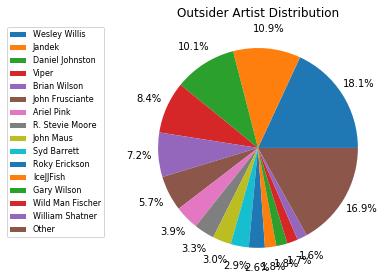

In [121]:
# Only shows the top 15 artists, as well as 48 "Other" artists grouped together

# Pie plot of top 15 artists & other
plt.pie(artists_to_plot, autopct='%1.1f%%', pctdistance = 1.2, labeldistance = 1.4)
plt.legend(artists_to_plot.index, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("Outsider Artist Distribution")
plt.savefig('../images/outsider_artist_dist_fig.png')
plt.tight_layout()
plt.show()

# NOTE: I couldn't get the percentages to not overlap.  Ideally, the smaller percentages wouldn't be displayed.

In [120]:
artists_to_plot

Wesley Willis       561
Jandek              339
Daniel Johnston     313
Viper               261
Brian Wilson        223
John Frusciante     177
Ariel Pink          121
R. Stevie Moore     102
John Maus            93
Syd Barrett          91
Roky Erickson        80
IceJJFish            57
Gary Wilson          56
Wild Man Fischer     54
William Shatner      50
Other               524
dtype: int64

In [122]:
lyricsdf.artist.describe()

count              3102
unique               62
top       Wesley Willis
freq                561
Name: artist, dtype: object

In [123]:
lyricsdf.lyrics.describe()

count                                                  3102
unique                                                 3036
top       I knew a girl and I like her still She said sh...
freq                                                      3
Name: lyrics, dtype: object

After cleaning up the data, Wesley Willis is still at the top of the artist-count list, followed by 7 artists with song volumes of the same magnitude (in the 100s).  Note that Willis has more representation in this dataset (18.1%) than 47 of the least frequent artists (16.9%).

In total, there are 3,102 viable lyric entries left in the dataset after cleaning.  Of this, there are 62 unique artists, and 3,036 unique entries.  Fewer unique entries than total entries implies that there are duplicates.  After investigation, these are lyrics that do NOT share the same title, but share the same lyrics.  In the future, I would need to investigate these items a bit more deeply to understand why this is happening; is it a phenomenon of the lyrics, or is it an issue with pulling from the Genius API?

**Most Common Words**

In [125]:
# The most common words in this dataset
from collections import Counter
outtoks = []

for toks in lyricsdf.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)
print(outfreq.most_common(20))

[('’', 33748), ('i', 25506), (',', 24260), ('the', 23883), ('you', 18573), ('a', 13452), ('and', 11878), ('to', 11611), ('s', 9768), ('it', 9523), ('me', 8931), ('my', 8541), ('in', 7396), ('t', 6646), ('of', 5641), ('that', 5491), ('on', 5125), ('m', 4951), ('your', 4242), ('is', 4035)]


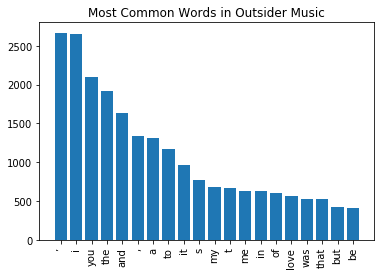

In [221]:
# Create bar plot with most common words and their counts
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Outsider Music")
plt.savefig("../images/out_most_common_words")
plt.show()

Unsurprisingly (or maybe surprisingly, given the nature of the data so far), the most common words in the dataset are pronouns, contractions, and other functional items or punctuation.  Let's try to look at the most common words that aren't stopwords ([source](https://stackoverflow.com/questions/31826950/dropping-specific-words-out-of-an-nltk-distribution-beyond-stopwords)).

In [127]:
# If we remove stopwords and punctuation, what do we get?
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['’', ',', '?', '!', '(', ')', '[', ']', '.', "'", '"',])   # also remove punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
lyricsdf_fd = nltk.FreqDist(filtered_outfreq)
print(lyricsdf_fd.most_common(20))

[('got', 3048), ('like', 2832), ('know', 2748), ('love', 2713), ('rock', 2396), ('go', 1964), ('na', 1960), ('time', 1870), ('get', 1856), ('oh', 1809), ('see', 1773), ('one', 1647), ('let', 1495), ('never', 1411), ('cause', 1335), ('ass', 1314), ('way', 1302), ('yeah', 1240), ('life', 1196), ('baby', 1195)]


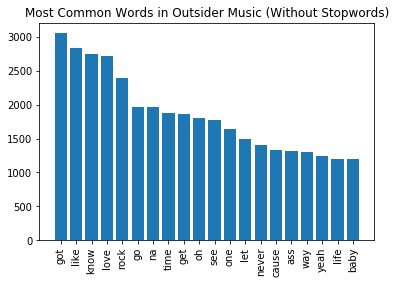

In [223]:
# Create bar plot with most common words and their counts (NOT including stopwords)
word = []
count = []
for (w, c) in lyricsdf_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Outsider Music (Without Stopwords)")
plt.savefig("../images/out_most_common_words_nostops")
plt.show()

In [129]:
# "Rock" and "ass" are interesting... in the most common words
# What's their distribution overall? 

rock = lyricsdf_fd["rock"]
ass = lyricsdf_fd["ass"]
rockpct = lyricsdf_fd["rock"] / lyricsdf.token_ct.sum()
asspct = lyricsdf_fd["ass"] / lyricsdf.token_ct.sum()

print("In Outsider Music:\n",
    "'rock' count =", rock, "\n",
     "'ass' count =", ass, "\n",
     "'rock' % =", rockpct, "\n",
     "'ass' % =", asspct, "\n")

In Outsider Music:
 'rock' count = 2396 
 'ass' count = 1314 
 'rock' % = 0.0035896099070836366 
 'ass' % = 0.001968592411480759 



Now these are some more interesting words!  I wonder how they'll play out against the "insider" music dataset--the Billboard Hot 100 corpus.

## Analysis of Popular Music
### Billboard Hot 100 Corpus
I'll be using Kaylin Pavlik's dataset from her ["50 Years of Pop Music"](https://www.kaylinpavlik.com/50-years-of-pop-music/) project as a means of comparison for the present outsider music dataset.  It should be noted that Pavlik's dataset contains the most popular music over a span of 5 decades, and so it is not perfectly comparable to the outsider music dataset, which does not contain information on temporal stratification or genre.

After some mild cleaning, we'll repeat the same analysis:
- token count distribution
- artist distribution
- most common word tokens, with and without stopwords

In [130]:
# load in the lyrics dataset
popdf = pd.read_csv("../data/billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
popdf.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [131]:
popdf.shape

(5100, 6)

Note that there are also about 2000 more data points in Pavlik's dataset. This dataset labels instrumental songs as such in the lyrics, but the outsider music dataset showed no lyrics for songs like this.  For consistency, I will remove the "instrumental" strings from the Lyrics column, along with the float `np.nan` values.

In [132]:
popdf.Lyrics = popdf.Lyrics.replace({np.nan: "", "instrumental":"", None:""})
popdf.Lyrics = popdf.Lyrics.astype(str)

popdf.iloc[2].Lyrics  # note that this is multiple spaces

'  '

In [133]:
# Reduce multiple spaces to an empty string
popdf.Lyrics = popdf.Lyrics.map(lambda x: x.strip())

In [134]:
# Now it's just an empty string instead of 2 spaces!
popdf.iloc[2].Lyrics

''

In [135]:
# slim down dataframe to only the necessary columns
popdf.rename(columns={"Song":"title", "Artist":"artist", "Lyrics":"lyrics"}, inplace=True)
popdf = popdf[["title", "artist", "lyrics"]]
popdf.head()

,title,artist,lyrics
0,wooly bully,sam the sham and the pharaohs,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,sugar pie honey bunch you know that i love you...
2,i cant get no satisfaction,the rolling stones,
3,you were on my mind,we five,when i woke up this morning you were on my min...
4,youve lost that lovin feelin,the righteous brothers,you never close your eyes anymore when i kiss ...


In [136]:
# Let's take a peek at an sample from this dataset
popdf.iloc[66].lyrics

'i dont know much about my history now dont know much about biology dont know much about the science book now dont know much about the french i tookall i do know is i love you now and i wonder if you love me too ooh what a wonderful world this could beooh i dont know much about geography now dont know much about trigonometry now dont know much about the algebra dont know what a slide rule is forbut i do know one and one is two now and i wonder if you love me too ooh what a wonderful world this could bei dont claim to be an a student but thats what im trying to be but by being an a student baby look like i could win your love for medont know much about the history now oh now dont know much about biology i dont know much about the science book now dont know much about the good french i took ohall i do know is i love you now oh now and i wonder if you love me too ooh what a wonderful world this could begood lord i dont claim to be an a student but thats what im trying to be oh now but if 

Note that this dataset isn't perfect either -- many words have been concatenated, likely because newlines were cut out, rather than replaced with spaces.  Because of this, words like "beooh," "tookall," "forbut," "bei," and "begood" will each be considered as single tokens.  However, in the interest of saving time and using existing resources, we'll assume that the frequencies of these words will be low enough to effect the ensuing analysis only minimally!

As done with the outsider dataset, we'll tokenize this dataset for word-level analysis.

In [137]:
# tokenize & lowercase, in case any remaining capitals are in the data
popdf["tokens"] = popdf.lyrics.map(lambda x: nltk.word_tokenize(x))
popdf.tokens = popdf.tokens.map(lambda x: [word.lower() for word in x])

# create token count column
popdf["token_ct"] = popdf.tokens.map(len)
popdf.head()

,title,artist,lyrics,tokens
0,wooly bully,sam the sham and the pharaohs,sam the sham miscellaneous wooly bully wooly b...,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,i cant help myself sugar pie honey bunch,four tops,sugar pie honey bunch you know that i love you...,"[sugar, pie, honey, bunch, you, know, that, i,..."
2,i cant get no satisfaction,the rolling stones,,[]
3,you were on my mind,we five,when i woke up this morning you were on my min...,"[when, i, woke, up, this, morning, you, were, ..."
4,youve lost that lovin feelin,the righteous brothers,you never close your eyes anymore when i kiss ...,"[you, never, close, your, eyes, anymore, when,..."


In [139]:
# popdf["type_ct"] = popdf.tokens.map(lambda x: len(set(x)))    # type not used in present analysis
# popdf["TTR"] = popdf.type_ct / popdf.token_ct                 # TTR not used in present analysis

In [140]:
popdf.describe()

,token_ct,type_ct,TTR
count,5100.000000,5100.000000,4851.000000
mean,316.646471,107.972353,0.367281
std,181.255214,58.376938,0.112131
min,0.000000,0.000000,0.053571
25%,204.000000,77.000000,0.293406
50%,285.000000,98.000000,0.353791
75%,399.000000,127.000000,0.427735
max,1158.000000,434.000000,1.000000


The token count minimum is 0, meaning there are empty strings still left in the data.  Time to remove those!  We'll also get rid of 'instrumental' lyrics and songs with string 'NA' as their lyric entries.

In [141]:
# save full dataset to different object in case it's needed later
popdf_orig = popdf

# drop empty/null lyrics, and instrumental lyrics
popdf = popdf[~popdf.lyrics.isin(['', 'instrumental', 'NA'])]
popdf.describe()

,token_ct,type_ct,TTR
count,4831.000000,4831.000000,4831.000000
mean,334.273856,113.980335,0.364661
std,169.678791,53.973813,0.104694
min,5.000000,3.000000,0.053571
25%,217.000000,81.000000,0.293062
50%,294.000000,101.000000,0.353135
75%,408.000000,130.000000,0.426829
max,1158.000000,434.000000,1.000000


Since this dataset contains the most popular music *each year*, there's a potential for some songs to be listed for multiple years.  Therefore, we need to make sure we remove duplicates.

In [144]:
# Remove lyric duplicates
popdf = popdf[~popdf.lyrics.duplicated()]

In [145]:
popdf.describe()

,token_ct,type_ct,TTR
count,4627.000000,4627.000000,4627.000000
mean,330.694402,113.308839,0.366537
std,168.976506,53.851214,0.105183
min,5.000000,3.000000,0.053571
25%,214.000000,80.000000,0.294569
50%,291.000000,100.000000,0.354949
75%,403.000000,129.000000,0.429320
max,1158.000000,434.000000,1.000000


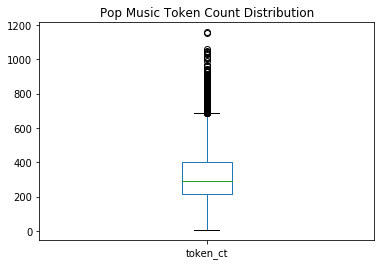

In [147]:
popdf.token_ct.plot(kind = "box", rot=0, title = "Pop Music Token Count Distribution")
plt.savefig('../images/pop_token_count_dist.png')

There are still some pretty long lyrics here, but the maximum token count is still nearly half that of the outsider music.  The distribution here seems to be a little more normal.  While the outside music had a great wealth of data crammed around the mean token count of 215.  Here, the mean is a little higher, at about 330 tokens per song (and potentially more, given that some words are concatenated mistakenly) and the spread is more consistent.

**Artist Distribution**

In [148]:
popdf.artist.describe()

count        4627
unique       2335
top       madonna
freq           33
Name: artist, dtype: object

This dataset has 2,335 unique artists (compared to our measly 62 artists in the outsider dataset).

In [149]:
popdf.artist.value_counts()

madonna                                33
elton john                             25
michael jackson                        22
mariah carey                           21
stevie wonder                          20
                                       ..
little anthony and the imperials        1
manfred mann                            1
eddy grant                              1
pussycat dolls featuring snoop dogg     1
the j geils band                        1
Name: artist, Length: 2335, dtype: int64

This dataset is much less skewed toward any particular artist. Madonna, who is most represented in Pavlik's Billboard data, only has 33 songs total.

In [153]:
# Separate the top 15 artists
pop_artists_to_plot = popdf.artist.value_counts()[:15]
pop_few_artist = popdf.artist.value_counts()[15:]

# Create an "other" group, which sums together the bottom artist counts
sum = 0
for y in pop_few_artist:
    sum = sum +y
pop_artists_to_plot = pop_artists_to_plot.append(pd.Series(sum))
pop_artists_to_plot.rename(index={0:'Other'},inplace=True)

In [156]:
# How much of the data do the top 15 artists represent?
1 - sum / len(popdf)

0.060082126647935996

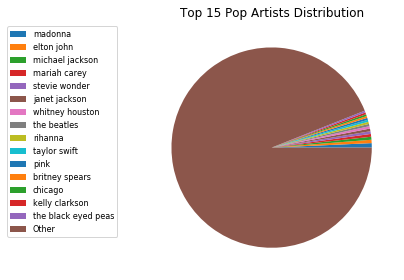

In [154]:
# Only shows the top 15 artists to be comparable to the outsider music chart
plt.pie(pop_artists_to_plot)
plt.title("Top 15 Pop Artists Distribution")
plt.legend(pop_artists_to_plot.index, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.tight_layout()
plt.savefig('../images/pop_artist_dist_fig.png')
plt.show()

This chart isn't a wonderfully informative visualization on its own, but in contrast to the outsider music dataset, you can see that the distribution is much less skewed toward any one artist.  The brown section, representing artists beyond the top-15, is 94% of the data.  Below, I will visualize again, but using a number of top artists proportional to the number of artists in Pavlik's dataset.

In [157]:
# Instead, use the top 24% of artists
proportion = 15/len(lyricsdf.artist.unique())
size = proportion * len(popdf.artist.unique())
size

564.9193548387098

In [158]:
# Separate top 565 artists
pop_artists_to_plot = popdf.artist.value_counts()[:566]
pop_few_artist = popdf.artist.value_counts()[566:]

# Create an "other" group, which sums together the bottom artist counts
sum = 0
for y in pop_few_artist:
    sum = sum +y
pop_artists_to_plot = pop_artists_to_plot.append(pd.Series(sum))
pop_artists_to_plot.rename(index={0:'Other'},inplace=True)

In [162]:
# How much of the data do the top 565 artists represent?
sum / len(popdf)

0.41711692241193

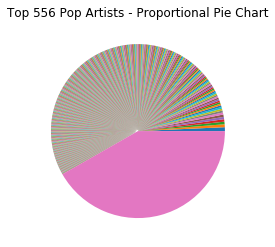

In [161]:
# Shows the top 556 artists to be comparable *proportionally* to the outsider music chart
plt.pie(pop_artists_to_plot)
plt.title("Top 556 Pop Artists - Proportional Pie Chart")
plt.savefig('../images/pop_proportional_artist_dist_fig.png')
plt.show()

Once again, alone, this chart is extremely unreadable, but it should be viewed contrastively to understand that, while the outsider music's "Other" artist category (about 76% of the artists) took up only 16.9% of the total lyrics dataset, the Billboard Pop Music dataset has 41.7% of its data in this "Other" category.

It should be clear by now, then, that a major issue with the outsider music dataset will be its representativeness, or generalizability.  Given the nature of the outsider music dataset (and given enough time), it would be interesting to analyze the outsider music dataset split between Wesley Willis songs alone and the full dataset without Willis's music. This could give some insight into how much Wesley Willis influences the overall dataset, as well as show whether the conventional understanding of outsider music is attrubutable mostly to Wesley Willis, if it does not hold true for both parts of the full dataset.

**Most Common Words**

In [167]:
# most common words in the pop dataset
poptoks = []

for toks in popdf.tokens:
    poptoks.extend(toks)

popfreq = Counter(poptoks)
print(popfreq.most_common(20))

[('you', 61169), ('i', 53492), ('the', 50769), ('to', 33997), ('and', 30831), ('me', 30105), ('a', 27758), ('it', 24194), ('my', 21436), ('in', 17595), ('that', 15130), ('on', 15084), ('your', 14731), ('love', 14478), ('im', 13585), ('be', 12296), ('of', 12241), ('all', 11256), ('dont', 11031), ('know', 10643)]


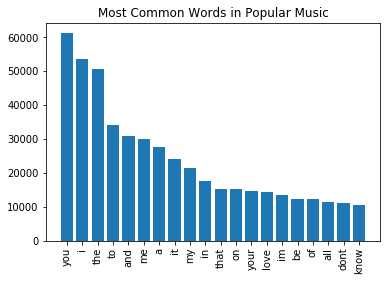

In [224]:
# Create bar plot with most common words and their counts
word = []
count = []
for (w, c) in popfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Popular Music")
plt.savefig("../images/pop_most_common_words")
plt.show()

In [169]:
# If we remove stopwords and punctuation, what do we get?
stopwords = nltk.corpus.stopwords.words('english')
# alter  stopwords so that it will catch "dont", "cant", etc.
stopwords = [x.replace("'", "") for x in stopwords]
filtered_popfreq = dict((word, freq) for word, freq in popfreq.items() if word not in (stopwords))
popdf_fd = nltk.FreqDist(filtered_popfreq)
print(popdf_fd.most_common(20))

[('love', 14478), ('im', 13585), ('know', 10643), ('na', 10456), ('like', 10185), ('got', 9653), ('oh', 9093), ('baby', 8647), ('get', 7748), ('yeah', 5957), ('want', 5859), ('go', 5769), ('make', 5162), ('one', 5125), ('cant', 5096), ('see', 4964), ('gon', 4960), ('time', 4958), ('come', 4673), ('let', 4632)]


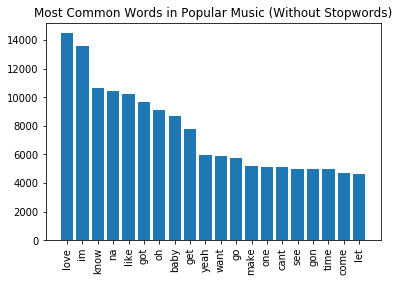

In [225]:
# Create bar plot with most common words and their counts (NOT including stopwords)
word = []
count = []
for (w, c) in popdf_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Popular Music (Without Stopwords)")
plt.savefig("../images/pop_most_common_words_nostops")
plt.show()

In [171]:
# Check up on "rock" and "ass" in the popular music dataset
rock = popdf_fd["rock"]
ass = popdf_fd["ass"]
rockpct = popdf_fd["rock"] / popdf.token_ct.sum()
asspct = popdf_fd["ass"] / popdf.token_ct.sum()
print("In Popular Music:\n",
    "'rock' count =", rock, "\n",
     "'ass' count =", ass, "\n",
     "'rock' % =", rockpct, "\n",
     "'ass' % =", asspct, "\n")

In Popular Music:
 'rock' count = 1238 
 'ass' count = 577 
 'rock' % = 0.0008090852826864246 
 'ass' % = 0.00037709386761717846 



Seeing words like "im," "dont," "youre," and "cant" pop up in the first non-stopwords analysis is a bit tell-tale that Pavlik's dataset has been cleaned very differently from the outsider music dataset.  Just removing the apostrophes in the stopwords list isn't enough either, since stopwords expects that the data is tokenized to split contractions (e.g., "i", "'", "m", for "I'm")

## Breakdown by Most Represented Outsider Musicians
### The Big 3:
**Wesley Willis, Jandek, and Daniel Johnston**    
These are the top 3 artists in the Outsider Music dataset.  They make up nearly 40% of the data, meaning the other remaining 59 artists comprise only a little over 60% of the data.

In [172]:
def top3(x):
    if x in ["Wesley Willis", "Jandek", "Daniel Johnston"]:
        return "top 3"
    else:
        return "other"
    
lyricsdf["top3"] = lyricsdf.artist.map(lambda x: top3(x))

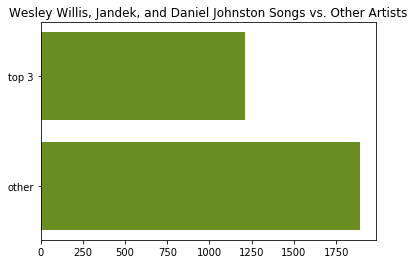

In [173]:
# Plot the top 3 artists' song counts against all other songs in the Outsider dataset
plt.barh(lyricsdf.top3.unique(), lyricsdf.top3.value_counts(), color = "olivedrab")
plt.title("Wesley Willis, Jandek, and Daniel Johnston Songs vs. Other Artists")
plt.savefig("../images/top3_vs_other_artists_distribution")
plt.show()

### Now What?
The data is clearly skewed, so further investigation of the outsider music dataset vs. the popular music dataset seems a bit futile.  Any information gleaned from further analysis will be indeterminate, not fully representative of all outsider musicians and not fully representative of artists like Wesley Willis, Jandek, or Daniel Johnston.

To conclude, we'll separate out the top 3 artists' music into 3 datasets and visualize the trends in their data against trends in the remaining musicians' lyrics.  This should give some insight into the skew of the data!

Deeper analysis for this section can be found in the final_report.md.

In [175]:
# separate Outsider Musicians into 4 datasets:
willis = lyricsdf[lyricsdf.artist == "Wesley Willis"]
jandek = lyricsdf[lyricsdf.artist == "Jandek"]
danjohn = lyricsdf[lyricsdf.artist == "Daniel Johnston"]

# Currently just looking at not Wesley Willis's Music!
otherout = lyricsdf[lyricsdf.artist != "Wesley Willis"]

In [176]:
willis.describe()

,token_ct
count,561.00000
mean,146.29590
std,37.97868
min,72.00000
25%,122.00000
50%,135.00000
75%,167.00000
max,507.00000


In [177]:
jandek.describe()

,token_ct
count,339.000000
mean,125.589971
std,191.103275
min,4.000000
25%,56.000000
50%,93.000000
75%,135.500000
max,2155.000000


In [178]:
danjohn.describe()

,token_ct
count,313.000000
mean,187.821086
std,98.124528
min,16.000000
25%,120.000000
50%,181.000000
75%,250.000000
max,593.000000


In [179]:
otherout.describe()

,token_ct
count,2541.000000
mean,230.385675
std,174.510025
min,1.000000
25%,115.000000
50%,194.000000
75%,300.000000
max,2155.000000


**Non-Wesley Willis Outsider Music**
- Artist Distribution
- Token Distribution
- Most Common Words

In [181]:
# Separate out the top 15 non-Wesley Willis artists
artists_to_plot = otherout.artist.value_counts()[:15]
few_artist = otherout.artist.value_counts()[15:]

# Create an "other" group, which sums together the bottom artist counts
sum = 0
for y in few_artist:
    sum = sum +y
artists_to_plot = artists_to_plot.append(pd.Series(sum))
artists_to_plot.rename(index={0:'Other'},inplace=True)

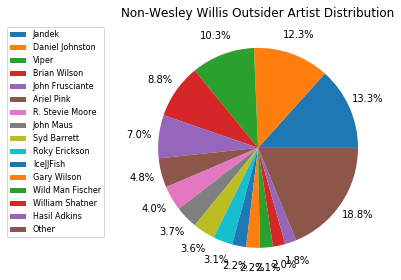

In [182]:
# Only shows the top 15 artists, as well as 48 "Other" artists grouped together
plt.pie(artists_to_plot, autopct='%1.1f%%', pctdistance = 1.2, labeldistance = 1.4)
plt.legend(artists_to_plot.index, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("Non-Wesley Willis Outsider Artist Distribution")
plt.savefig('../images/otherout_artist_dist_fig.png')
plt.tight_layout()
plt.show()

The remaining 46 artists still represent less than 20% of the data.  Jandek, Daniel Johnston, Viper, Brian Wilson, and John Frusciante still make up a good portion of this data, but currently the goal is just to see exactly how much of the skew is toward *Wesley Willis*.  Other artists may be analyzed later.

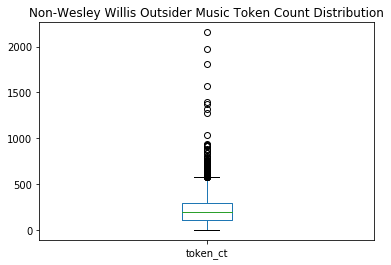

In [183]:
otherout.token_ct.plot(kind = "box", rot=0, title = "Non-Wesley Willis Outsider Music Token Count Distribution")
plt.savefig('../images/otherout_token_count_dist.png')

In [184]:
otherout.token_ct.describe()

count    2541.000000
mean      230.385675
std       174.510025
min         1.000000
25%       115.000000
50%       194.000000
75%       300.000000
max      2155.000000
Name: token_ct, dtype: float64

In [190]:
# The most common words in the other outsiders dataset
outtoks = []

for toks in otherout.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)

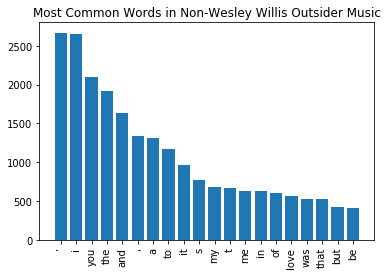

In [226]:
# Create bar plot with most common words and their counts
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Non-Wesley Willis Outsider Music")
plt.savefig("../images/otherout_most_common_words")
plt.show()

In [192]:
# remove stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['’', ',', '?', '!', '(', ')', '[', ']', '.', "'", '"',])   # also remove punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
otherout_fd = nltk.FreqDist(filtered_outfreq)

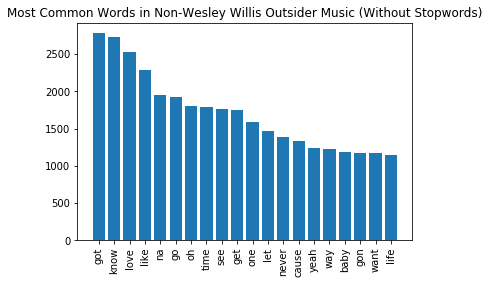

In [227]:
# Create bar plot with most common words and their counts (NOT including stopwords)
word = []
count = []
for (w, c) in otherout_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Non-Wesley Willis Outsider Music (Without Stopwords)")
plt.savefig("../images/otherout_most_common_words_nostops")
plt.show()

In [ ]:
# "rock" and "ass" in non-Wesley Willis Music
rock = otherout_fd["rock"]
ass = otherout_fd["ass"]
rockpct = otherout_fd["rock"] / otherout.token_ct.sum()
asspct = otherout_fd["ass"] / otherout.token_ct.sum()
print("In non-Wesley Willis Outsider Music:\n",
    "'rock' count =", rock, "\n",
     "'ass' count =", ass, "\n",
     "'rock' % =", rockpct, "\n",
     "'ass' % =", asspct, "\n")

**Wesley Willis ONLY**
- Token Count Distribution
- Most Common Words

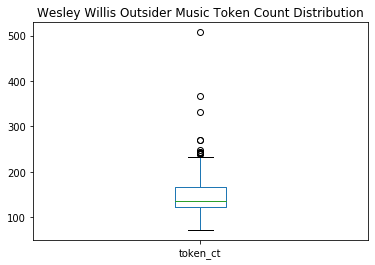

In [194]:
willis.token_ct.plot(kind = "box", rot=0, title = "Wesley Willis Outsider Music Token Count Distribution")
plt.savefig('../images/willis_token_count_dist.png')

In [195]:
willis.token_ct.describe()

count    561.00000
mean     146.29590
std       37.97868
min       72.00000
25%      122.00000
50%      135.00000
75%      167.00000
max      507.00000
Name: token_ct, dtype: float64

In [196]:
# The most common words in the Wesley Willis dataset
outtoks = []

for toks in willis.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)

[('the', 4845), ('a', 3051), ('’', 2708), ('rock', 2117), ('s', 1941), (',', 1762), ('you', 1618), ('was', 1395), ('on', 1218), ('my', 1211), ('i', 1163), ('ass', 1162), ('it', 1116), ('to', 1043), ('are', 994), ('me', 907), ('of', 869), ('in', 822), ('at', 810), ('over', 736)]


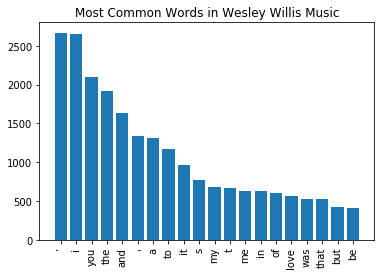

In [228]:
# Create bar plot with most common words and their counts
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Wesley Willis Music")
plt.savefig("../images/willis_most_common_words")
plt.show()

In [198]:
# remove stopwords and punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
willis_fd = nltk.FreqDist(filtered_outfreq)

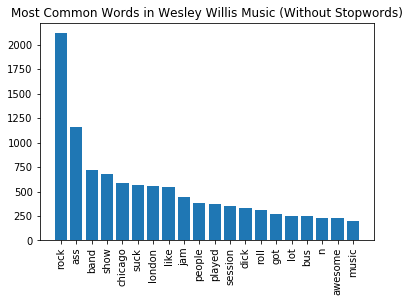

In [229]:
# Create bar plot with most common words and their counts (NOT including stopwords)
word = []
count = []
for (w, c) in willis_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Wesley Willis Music (Without Stopwords)")
plt.savefig("../images/willis_most_common_words_nostops")
plt.show()

This is not surprising.  Willis's most common words: rock and ass!

In [201]:
# "Rock" and "ass" in Wesley Willis's Music
rock = willis_fd["rock"]
ass = willis_fd["ass"]
rockpct = willis_fd["rock"] / willis.token_ct.sum()
asspct = willis_fd["ass"] / willis.token_ct.sum()
print("In Wesley Willis Music:\n",
    "'rock' count =", rock, "\n",
     "'ass' count =", ass, "\n",
     "'rock' % =", rockpct, "\n",
     "'ass' % =", asspct, "\n")

In Wesley Willis Music:
 'rock' count = 2117 
 'ass' count = 1162 
 'rock' % = 0.02579442440783702 
 'ass' % = 0.014158300029242616 



**Jandek, Daniel Johnston, and Non-Top 3 Outsider Musicians**    
Lastly, let's run a quick analysis on Jandek and Daniel Johnston, just to see if their data may have skewed the original analysis, as well.
- Token Distribution
- Most Common Words

In [203]:
# Create a dataset without the top 3 artists:
notop3 = lyricsdf[~lyricsdf.artist.isin(["Wesley Willis", "Daniel Johnston", "Jandek"])]

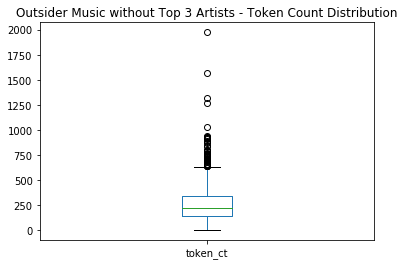

In [204]:
# Plot the token distribution without the top 3 artists
notop3.token_ct.plot(kind = "box", rot=0, title = "Outsider Music without Top 3 Artists - Token Count Distribution")
plt.savefig('../images/no_top3_token_count_dist.png')

In [205]:
notop3.token_ct.describe()

count    1889.000000
mean      256.245103
std       172.916354
min         1.000000
25%       140.000000
50%       218.000000
75%       338.000000
max      1974.000000
Name: token_ct, dtype: float64

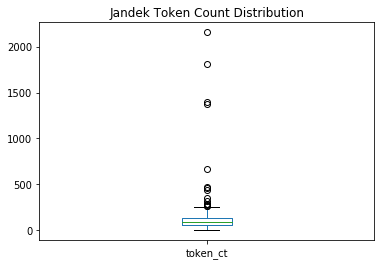

In [206]:
# Jandek's token count distribution
jandek.token_ct.plot(kind = "box", rot=0, title = "Jandek Token Count Distribution")
plt.savefig('../images/jandek_token_count_dist.png')

In [207]:
jandek.token_ct.describe()

count     339.000000
mean      125.589971
std       191.103275
min         4.000000
25%        56.000000
50%        93.000000
75%       135.500000
max      2155.000000
Name: token_ct, dtype: float64

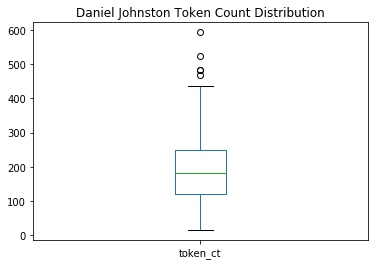

In [209]:
# Daniel Johnston's token count distribution
danjohn.token_ct.plot(kind = "box", rot=0, title = "Daniel Johnston Token Count Distribution")
plt.savefig('../images/daniel_johnston_token_count_dist.png')

In [210]:
danjohn.token_ct.describe()

count    313.000000
mean     187.821086
std       98.124528
min       16.000000
25%      120.000000
50%      181.000000
75%      250.000000
max      593.000000
Name: token_ct, dtype: float64

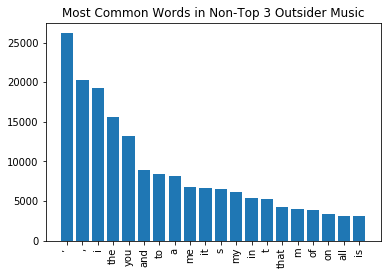

In [230]:
# The most common words in the non-top 3 outsiders dataset
outtoks = []

for toks in notop3.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)

# Create a plot for most common 20 words
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Non-Top 3 Outsider Music")
plt.savefig("../images/no_top3_most_common_words")
plt.show()

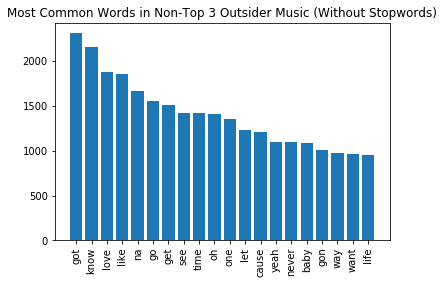

In [231]:
# remove stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['’', ',', '?', '!', '(', ')', '[', ']', '.', "'", '"',])
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
notop3_fd = nltk.FreqDist(filtered_outfreq)

# Create a plot for most common 20 words (NOT including stopwords)
word = []
count = []
for (w, c) in notop3_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Non-Top 3 Outsider Music (Without Stopwords)")
plt.savefig("../images/no_top3_most_common_words_nostops")
plt.show()

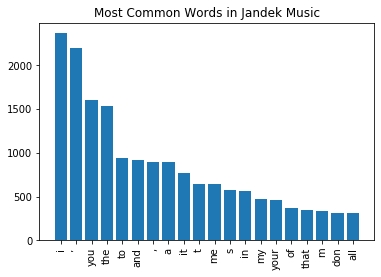

In [232]:
# The most common words in the Jandek dataset
outtoks = []

for toks in jandek.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)

# Create a plot for most common 20 words
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Jandek Music")
plt.savefig("../images/jandek_most_common_words")
plt.show()

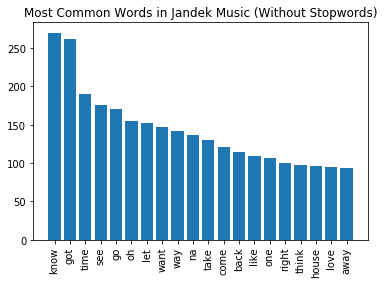

In [233]:
# remove stopwords and punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
jandek_fd = nltk.FreqDist(filtered_outfreq)

# Create a plot for most common 20 words (NOT including stopwords)
word = []
count = []
for (w, c) in jandek_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Jandek Music (Without Stopwords)")
plt.savefig("../images/jandek_most_common_words_nostops")
plt.show()

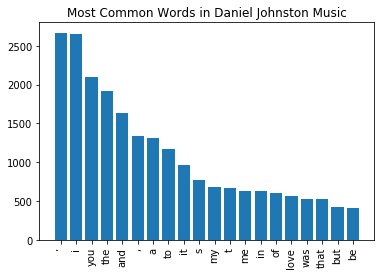

In [234]:
# The most common words in the Daniel Johnston dataset
outtoks = []

for toks in danjohn.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)

# Create a plot for most common 20 words
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Daniel Johnston Music")
plt.savefig("../images/daniel_johnston_most_common_words")
plt.show()

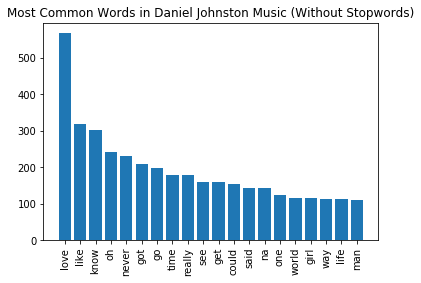

In [235]:
# remove stopwords and punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
danjohn_fd = nltk.FreqDist(filtered_outfreq)

# Create a plot for most common 20 words (NOT including stopwords)
word = []
count = []
for (w, c) in danjohn_fd.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.title("Most Common Words in Daniel Johnston Music (Without Stopwords)")
plt.savefig("../images/daniel_johnston_most_common_words_nostops")
plt.show()

In [217]:
# Jandek's 2 most common words:
# KNOW
know = jandek_fd["know"]
knowpct = jandek_fd["know"] / jandek.token_ct.sum()
print("KNOW in Jandek Music:\n",
    "'know' count =", know, "\n",
     "'know' % =", knowpct)

know = notop3_fd["know"]
knowpct = notop3_fd["know"] / notop3.token_ct.sum()
print("KNOW in Outsider Music without Top 3 Artists:\n",
    "'know' count =", know, "\n",
     "'know' % =", knowpct)

KNOW in Jandek Music:
 'know' count = 270 
 'know' % = 0.006341749853200235
KNOW in Outsider Music without Top 3 Artists:
 'know' count = 2153 
 'know' % = 0.004447915181790198


In [219]:
# GOT
got = jandek_fd["got"]
gotpct = jandek_fd["got"] / jandek.token_ct.sum()
print("GOT in Jandek Music:\n",
    "'got' count =", got, "\n",
     "'got' % =", gotpct)

got = notop3_fd["got"]
gotpct = notop3_fd["got"] / notop3.token_ct.sum()
print("GOT in Outsider Music without Top 3 Artists:\n",
    "'got' count =", got, "\n",
     "'got' % =", gotpct)

GOT in Jandek Music:
 'got' count = 261 
 'got' % = 0.006130358191426894
GOT in Outsider Music without Top 3 Artists:
 'got' count = 2311 
 'got' % = 0.004774329765497978


In [220]:
# Daniel Johnston's most common word:
# LOVE
love = danjohn_fd["love"]
lovepct = danjohn_fd["love"] / danjohn.token_ct.sum()
print("LOVE in Daniel Johnston Music:\n",
    "'love' count =", love, "\n",
     "'love' % =", lovepct)

love = notop3_fd["love"]
lovepct = notop3_fd["love"] / notop3.token_ct.sum()
print("LOVE in Outsider Music without Top 3 Artists:\n",
    "'love' count =", love, "\n",
     "'love' % =", lovepct)

LOVE in Daniel Johnston Music:
 'love' count = 568 
 'love' % = 0.00966183574879227
LOVE in Outsider Music without Top 3 Artists:
 'love' count = 1874 
 'love' % = 0.003871524872584687
